In [244]:
## Neccessary Libraries import

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [245]:
#Independent Variables
boston = load_boston()
boston_data = pd.DataFrame(boston.data)

feature_names = boston['feature_names']

for i in range(boston_data.shape[1]):
  boston_data.rename(columns={i:feature_names[i]},inplace=True)

boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [246]:
#Dependent Variable
Y = pd.DataFrame(boston['target'],columns=['Target'])
Y

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [247]:
##Understanding the variable description
boston['DESCR'].split(sep = "\n")

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [248]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [249]:
boston_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

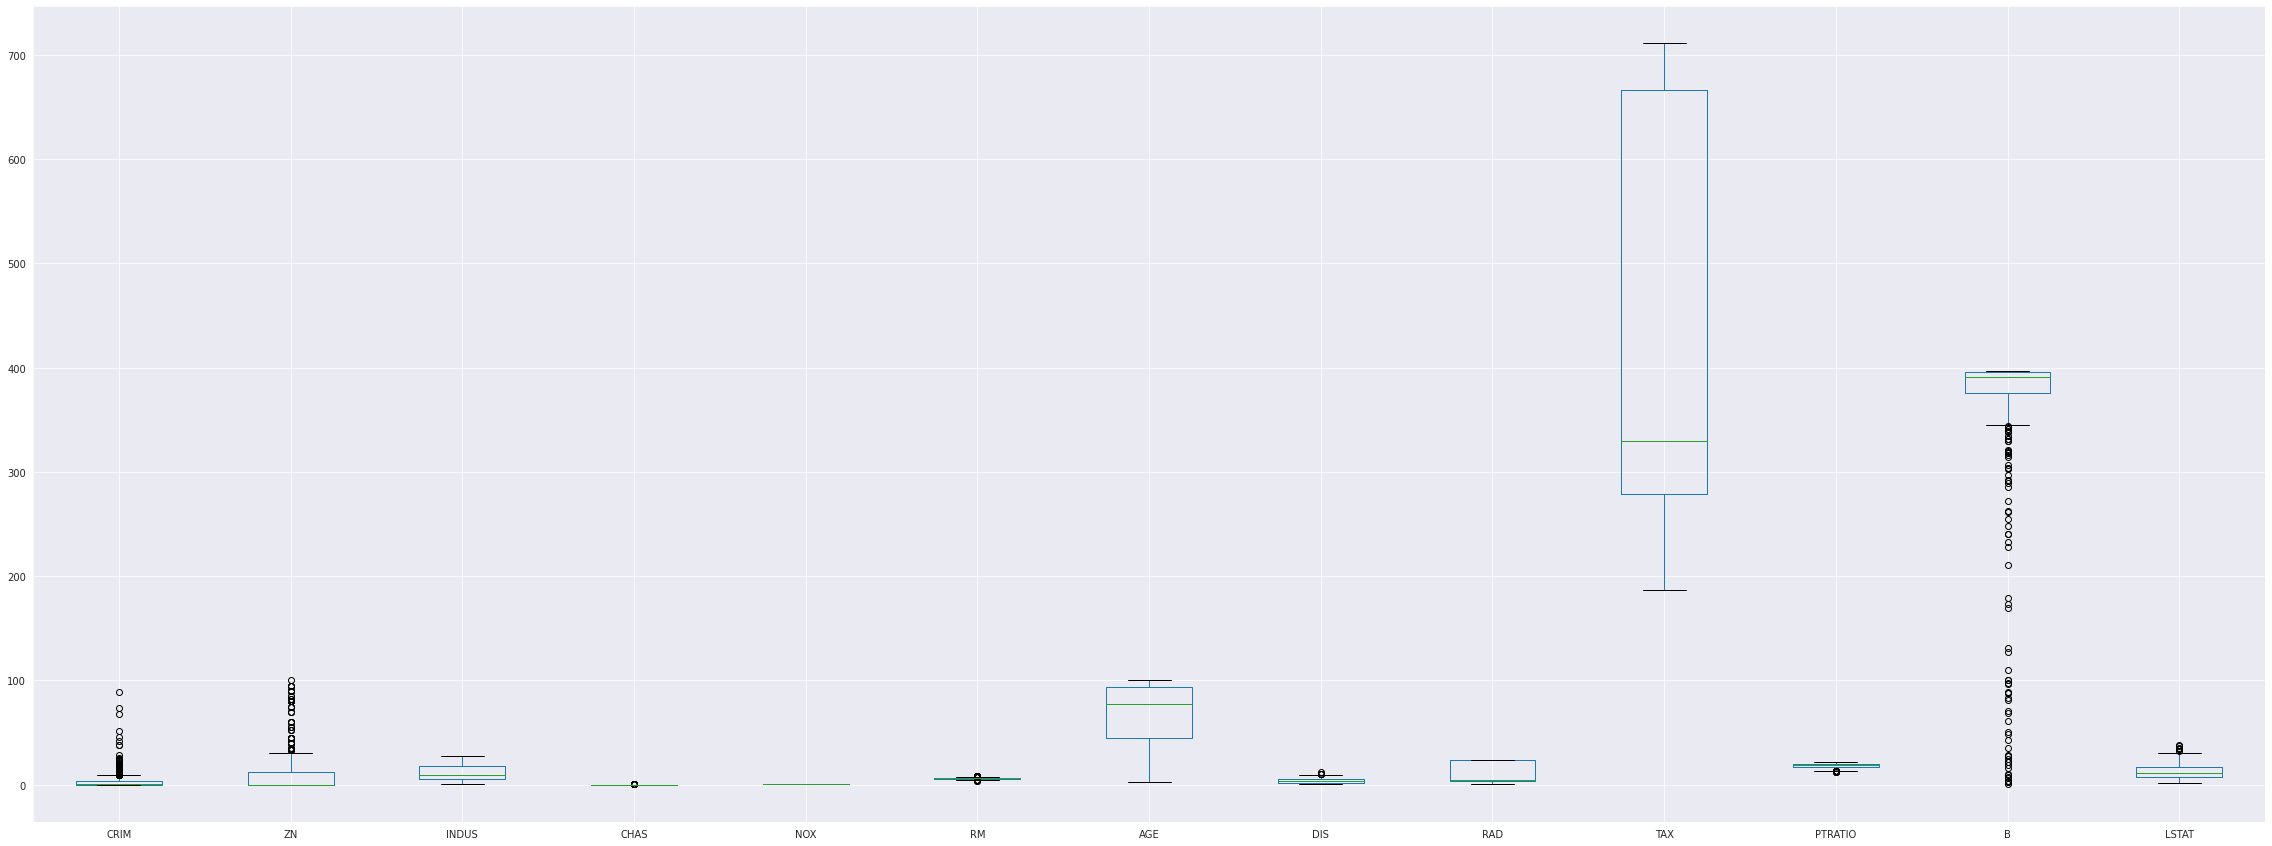

In [250]:
#using boxplot to identify the outliers
boston_data.boxplot(figsize=(40,15))

In [251]:
#Treating Outliers
boston_data.CRIM[boston_data['CRIM']>boston_data['CRIM'].quantile(0.99)]=boston_data['CRIM'].quantile(0.99)
boston_data.ZN[boston_data['ZN']>boston_data['ZN'].quantile(0.99)]=boston_data['ZN'].quantile(0.99)
boston_data.B[boston_data['B']<boston_data['B'].quantile(0.05)]=boston_data['B'].quantile(0.05)

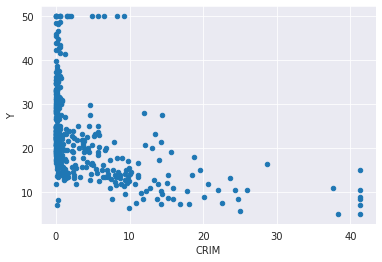

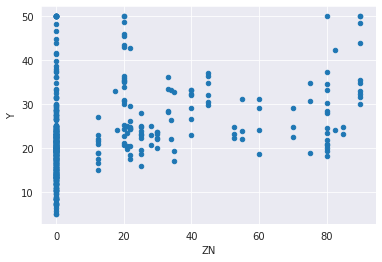

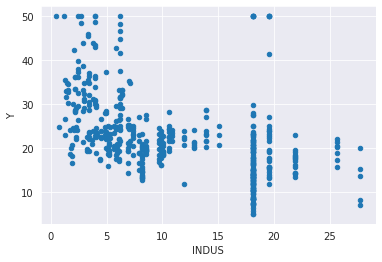

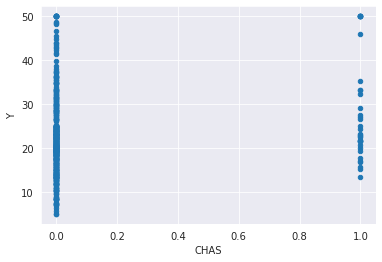

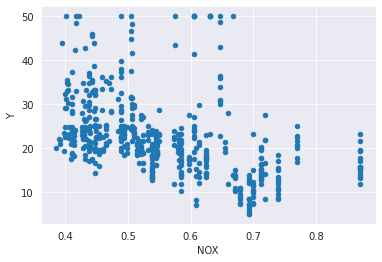

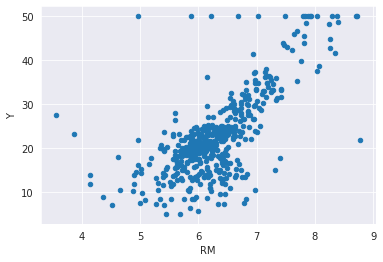

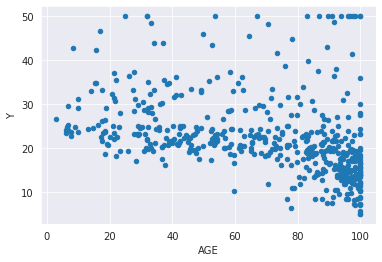

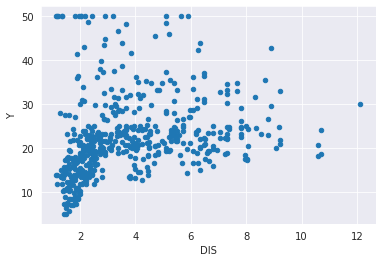

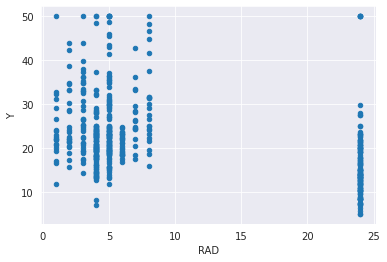

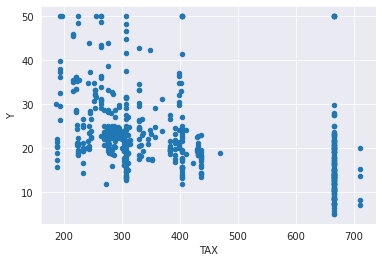

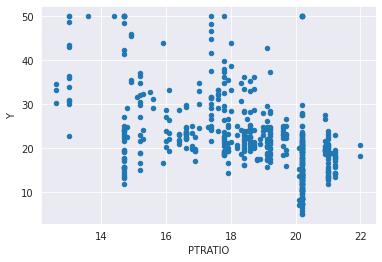

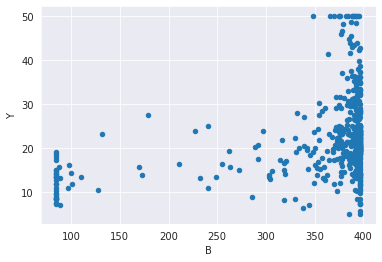

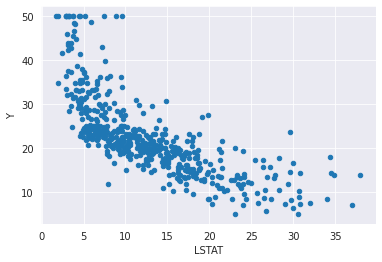

In [252]:
#Determining Linear Relationship between X and Y Variable
boston_data['Y']=Y
sns.set_style("darkgrid")
for ele in feature_names:
  boston_data.plot(kind = 'scatter', x = ele, y = 'Y',subplots = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

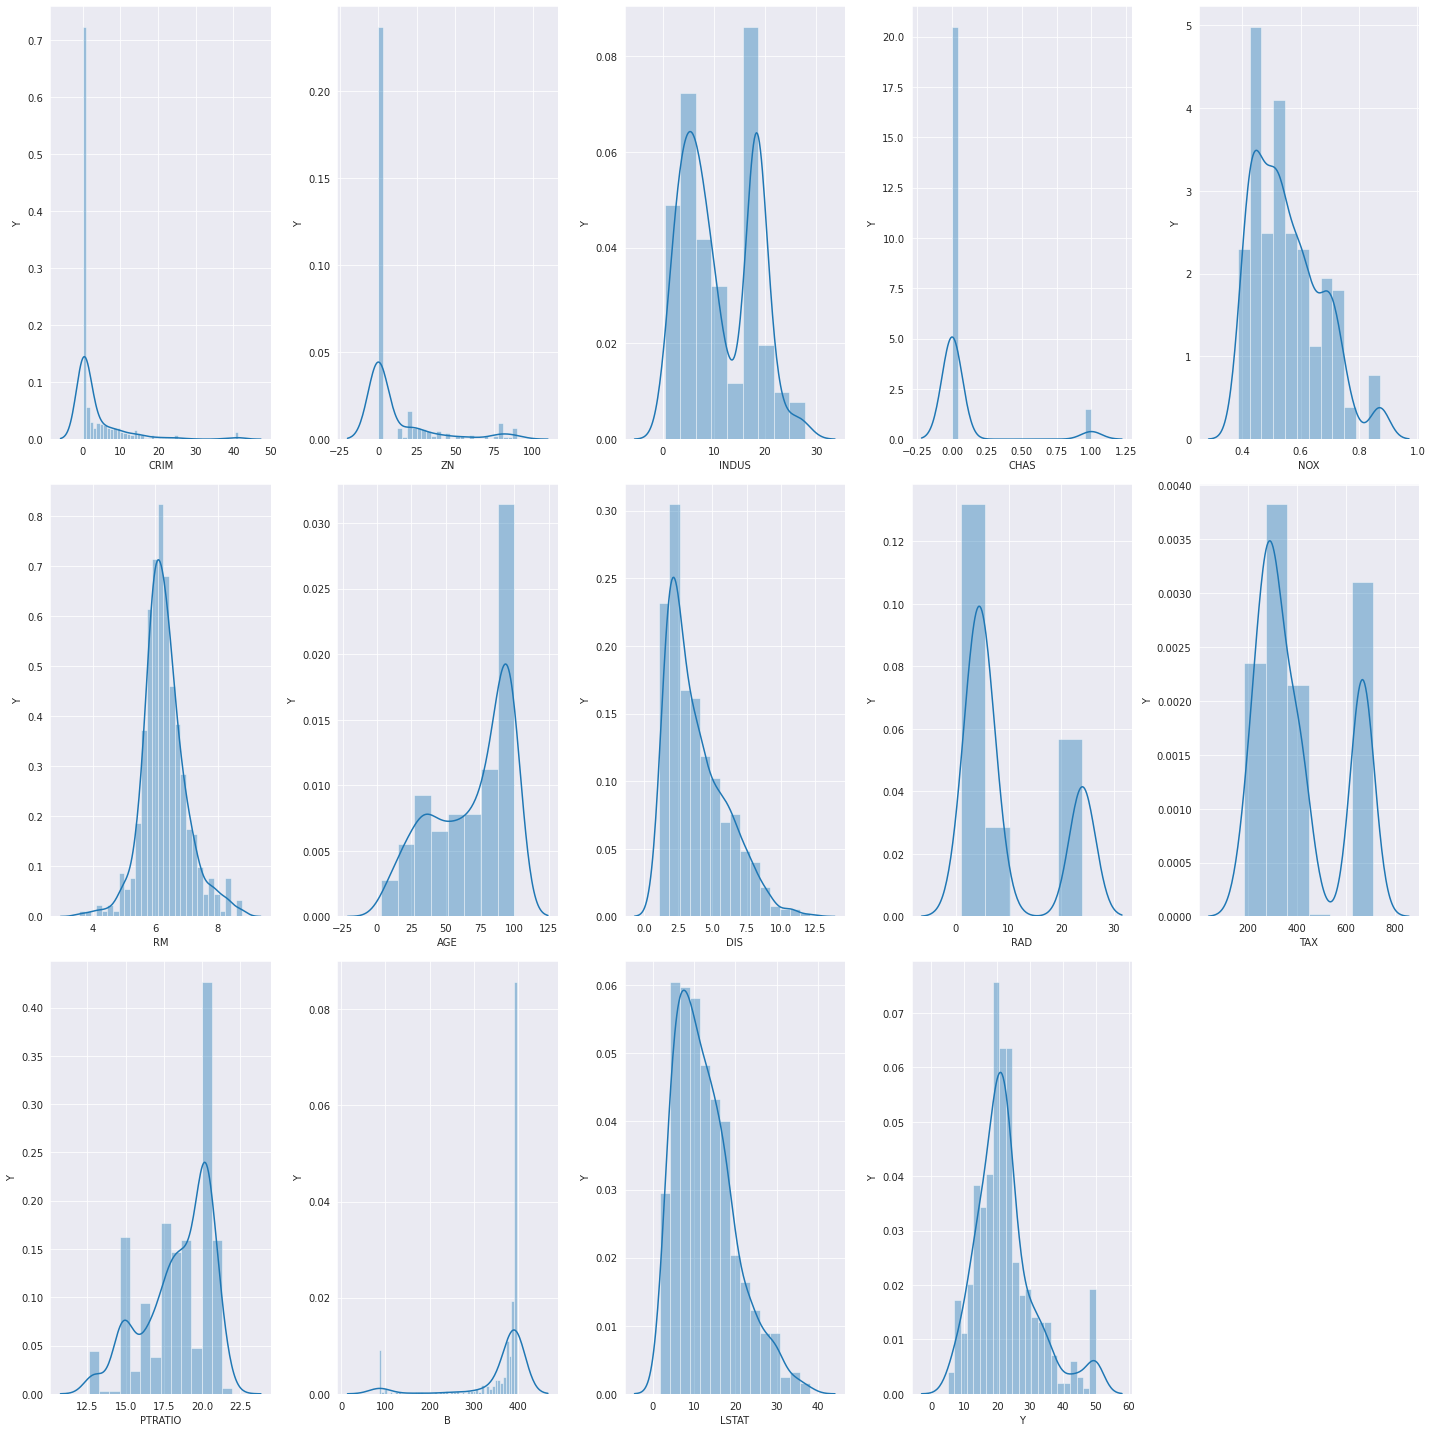

In [253]:
plt.figure(figsize=(20,20))

plotno=1

for feature in boston_data.columns:
  if plotno<=16:
    ax = plt.subplot(3,5,plotno)
    sns.distplot(boston_data[feature])
    ax.set_xlabel(feature)
    ax.set_ylabel('Y')
    plotno+=1
plt.tight_layout()

In [254]:
#scaling the X variable
scaler = StandardScaler()
boston_data = boston_data.drop(columns=['Y'])

X_scaled = scaler.fit_transform(boston_data)
X_scaled

array([[-0.4880829 ,  0.28998319, -1.2879095 , ..., -1.45900038,
         0.46076873, -1.0755623 ],
       [-0.48504182, -0.48958201, -0.59338101, ..., -0.30309415,
         0.46076873, -0.49243937],
       [-0.48504471, -0.48958201, -0.59338101, ..., -0.30309415,
         0.41064508, -1.2087274 ],
       ...,
       [-0.4801955 , -0.48958201,  0.11573841, ...,  1.17646583,
         0.46076873, -0.98304761],
       [-0.4731209 , -0.48958201,  0.11573841, ...,  1.17646583,
         0.41828062, -0.86530163],
       [-0.48212968, -0.48958201,  0.11573841, ...,  1.17646583,
         0.46076873, -0.66905833]])

In [255]:
#Checking multicollinearity

variables = X_scaled

vif = pd.DataFrame()

vif['VIF']= [variance_inflation_factor(variables,i) for i  in range(variables.shape[1])]

vif['features']=feature_names

vif.sort_values(by=['VIF'],ascending=True).reset_index(drop=True)

,VIF,features
0,1.074924,CHAS
1,1.362456,B
2,1.802066,PTRATIO
3,1.934782,RM
4,2.323589,ZN
5,2.430040,CRIM
6,3.003965,LSTAT
7,3.100939,AGE
8,3.997807,INDUS
9,4.000733,DIS


In [256]:
X_scaled=pd.DataFrame(X_scaled)
for ele in range(X_scaled.shape[1]):
  X_scaled.rename(columns={ele:feature_names[ele]},inplace=True)  

In [257]:
X_scaled.drop(columns=['RAD','TAX'],inplace=True)
X_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,-0.488083,0.289983,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-1.459000,0.460769,-1.075562
1,-0.485042,-0.489582,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.303094,0.460769,-0.492439
2,-0.485045,-0.489582,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.303094,0.410645,-1.208727
3,-0.484309,-0.489582,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,0.113032,0.432813,-1.361517
4,-0.478994,-0.489582,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,0.113032,0.460769,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.479925,-0.489582,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,1.176466,0.400300,-0.418147
502,-0.482440,-0.489582,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,1.176466,0.460769,-0.500850
503,-0.480196,-0.489582,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,1.176466,0.460769,-0.983048
504,-0.473121,-0.489582,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,1.176466,0.418281,-0.865302


In [258]:
#train_test_split
x_train,x_test,y_train,y_test =  train_test_split(X_scaled,Y,test_size = 0.2,random_state =30)

In [259]:
linear_model = LinearRegression()

In [260]:

linear_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [261]:
linear_model.score(x_train,y_train)

0.7286029422015007

In [262]:
linear_model.score(x_test,y_test)

0.7075593332648439

In [263]:
formula ="+".join(X_scaled.columns)

formula="Y~"+formula

formula

'Y~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+PTRATIO+B+LSTAT'

In [264]:
#using ols to identify factors contributing in model formation
X_scaled['Y']=Y
model  = smf.ols(formula,data=X_scaled).fit()

In [265]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     119.6
Date:                Sun, 11 Apr 2021   Prob (F-statistic):          1.42e-131
Time:                        14:29:17   Log-Likelihood:                -1511.7
No. Observations:                 506   AIC:                             3047.
Df Residuals:                     494   BIC:                             3098.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.216    104.337      0.000      22.108      22.957
CRIM          -0.3438      0.285     -1.205      0.229      -0.904       0.217
ZN             0.9246      0.320      2.892      0.004       0.296       1.553
INDUS         -0.3153      0.385     -0.819      0.413      -1.072       0.441
CHAS           0.7918      0.222      3.565      0.000       0.355       1.228
NOX           -1.7040      0.428     -3.978      0.000      -2.546      -0.862
RM             2.8797      0.295      9.758      0.000       2.300       3.460
AGE           -0.1133      0.379     -0.299      0.765      -0.858       0.631
DIS           -3.0910      0.432     -7.161      0.000      -3.939      -2.243
PTRATIO       -1.7949      0.266     -6.743      0.000      -2.318      -1.272
B              0.7450      0.251      2.974      0.003       0.253       1.237
LSTAT         -3.7227      0.374     -9.948      0.000      -4.458      -2.987
==============================================================================
Omnibus:                      189.700   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              920.193
Skew:                           1.595   Prob(JB):                    1.52e-200
Kurtosis:                       8.785   Cond. No.                         5.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [266]:
formula = "Y~ZN+CHAS+NOX+RM+DIS+PTRATIO+B+LSTAT"

model  = smf.ols(formula,data=X_scaled).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     164.5
Date:                Sun, 11 Apr 2021   Prob (F-statistic):          2.16e-134
Time:                        14:29:19   Log-Likelihood:                -1512.8
No. Observations:                 506   AIC:                             3044.
Df Residuals:                     497   BIC:                             3082.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.216    104.422      0.000      22.109      22.957
ZN             0.8622      0.311      2.773      0.006       0.251       1.473
CHAS           0.7919      0.221      3.583      0.000       0.358       1.226
NOX           -1.9293      0.375     -5.145      0.000      -2.666      -1.193
RM             2.8793      0.287     10.038      0.000       2.316       3.443
DIS           -2.8992      0.396     -7.326      0.000      -3.677      -2.122
PTRATIO       -1.9231      0.250     -7.679      0.000      -2.415      -1.431
B              0.8249      0.242      3.409      0.001       0.349       1.300
LSTAT         -3.8847      0.340    -11.414      0.000      -4.553      -3.216
==============================================================================
Omnibus:                      178.367   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              821.956
Skew:                           1.506   Prob(JB):                    3.27e-179
Kurtosis:                       8.470   Cond. No.                         4.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


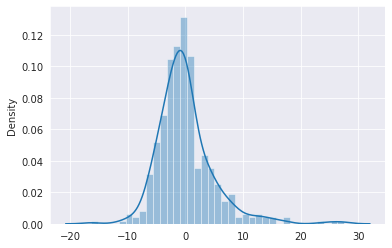

In [267]:
sns.distplot((y_train - linear_model.predict(x_train)))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


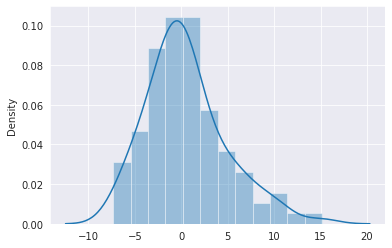

In [268]:
sns.distplot((y_test - linear_model.predict(x_test)))